In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib.parse
from pprint import pprint


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/us_cities.csv"


In [34]:
# collect full list of cities from Teleport API 
cities_avail_url = "https://api.teleport.org/api/urban_areas/"

cities_series = []
cities_list = []
cities_response = requests.get(cities_avail_url).json()
#         print(query_url)
# pprint(cities_response['_links']['ua:item'][0])


for kittens in cities_response['_links']['ua:item']:
    cities_list.append(kittens['name'])
# cities_series.append(cities_response['_links']['ua:item'])

# cities_series = cities_response['ua_item']
# print(cities_list)

In [35]:
# list of cities
# cities = ['houston','dallas','austin','baltimore','sacramento','san francisco','new jersey']
cities = cities_list


In [36]:
#  API call structure / Save config information
# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
url = "https://api.teleport.org/api/urban_areas/slug:"




In [37]:
# set up lists to hold response info
housing = []
cost_of_living = []
safety = []
healthcare = []
education = []
environmental_quality = []
economy = []
taxation = []
outdoors = []
teleport_score = []

processed_cities = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        
        # Build query URL with city
       
        city = city.replace(', ','-')
        city = city.replace(' ','-')
        query_url = url + city + "/scores/"
        query_url = query_url.lower()
#         query_url = urllib.parse.quote_plus(query_url)
#         print(query_url)
#         break
        response = requests.get(query_url).json()
        
        print(query_url)
#         pprint(response)

        housing.append(response['categories'][0]['score_out_of_10'])
        cost_of_living.append(response['categories'][1]['score_out_of_10'])
        safety.append(response['categories'][7]['score_out_of_10'])
        healthcare.append(response['categories'][8]['score_out_of_10'])
        education.append(response['categories'][9]['score_out_of_10'])
        environmental_quality.append(response['categories'][10]['score_out_of_10'])
        economy.append(response['categories'][11]['score_out_of_10'])
        taxation.append(response['categories'][12]['score_out_of_10'])

        outdoors.append(response['categories'][16]['score_out_of_10'])
        teleport_score.append(response['teleport_city_score'])

        


#         temp.append(response['main']['temp'])
#         humid.append(response['main']['humidity'])
#         cloudy.append(response['clouds']['all'])
#         windy.append(response['wind']['speed'])
#         # Include print log with city id and name 
#         name = response['name']
#         cityid = response['id']
#         print(f"The city being processed is: {name} with an ID of {cityid}")
        processed_cities.append(city)
    except:
        print(f"This row has an error, see cities list above")
        print(query_url)
#         cities.remove(city)
        pass
#         continue
    



# print(f"The latitude information received is: {lat}")
# print(f"The temperature information received is: {temp}")

# print(response)

https://api.teleport.org/api/urban_areas/slug:aarhus/scores/
https://api.teleport.org/api/urban_areas/slug:adelaide/scores/
https://api.teleport.org/api/urban_areas/slug:albuquerque/scores/
https://api.teleport.org/api/urban_areas/slug:almaty/scores/
https://api.teleport.org/api/urban_areas/slug:amsterdam/scores/
https://api.teleport.org/api/urban_areas/slug:anchorage/scores/
https://api.teleport.org/api/urban_areas/slug:andorra/scores/
https://api.teleport.org/api/urban_areas/slug:ankara/scores/
https://api.teleport.org/api/urban_areas/slug:asheville/scores/
https://api.teleport.org/api/urban_areas/slug:asuncion/scores/
https://api.teleport.org/api/urban_areas/slug:athens/scores/
https://api.teleport.org/api/urban_areas/slug:atlanta/scores/
https://api.teleport.org/api/urban_areas/slug:auckland/scores/
https://api.teleport.org/api/urban_areas/slug:austin/scores/
https://api.teleport.org/api/urban_areas/slug:baku/scores/
https://api.teleport.org/api/urban_areas/slug:bali/scores/
https:

https://api.teleport.org/api/urban_areas/slug:las-vegas/scores/
https://api.teleport.org/api/urban_areas/slug:lausanne/scores/
https://api.teleport.org/api/urban_areas/slug:leeds/scores/
https://api.teleport.org/api/urban_areas/slug:leipzig/scores/
https://api.teleport.org/api/urban_areas/slug:lille/scores/
https://api.teleport.org/api/urban_areas/slug:lima/scores/
https://api.teleport.org/api/urban_areas/slug:lisbon/scores/
https://api.teleport.org/api/urban_areas/slug:liverpool/scores/
https://api.teleport.org/api/urban_areas/slug:ljubljana/scores/
https://api.teleport.org/api/urban_areas/slug:london/scores/
https://api.teleport.org/api/urban_areas/slug:los-angeles/scores/
https://api.teleport.org/api/urban_areas/slug:louisville/scores/
https://api.teleport.org/api/urban_areas/slug:luxembourg/scores/
https://api.teleport.org/api/urban_areas/slug:lviv/scores/
https://api.teleport.org/api/urban_areas/slug:lyon/scores/
https://api.teleport.org/api/urban_areas/slug:madison/scores/
https:

This row has an error, see cities list above
https://api.teleport.org/api/urban_areas/slug:washington-d.c./scores/
https://api.teleport.org/api/urban_areas/slug:wellington/scores/
https://api.teleport.org/api/urban_areas/slug:winnipeg/scores/
https://api.teleport.org/api/urban_areas/slug:wroclaw/scores/
https://api.teleport.org/api/urban_areas/slug:yerevan/scores/
https://api.teleport.org/api/urban_areas/slug:zagreb/scores/
https://api.teleport.org/api/urban_areas/slug:zurich/scores/


In [38]:
# create a data frame from cities, scores
city_dict = {
    "city": processed_cities,
    "housing": housing,
    "cost_of_living": cost_of_living,
    "safety": safety,
    "healthcare": healthcare,
    "education": education,
    "environmental_quality": environmental_quality,
    "economy": economy,
    "taxation": taxation,
    "outdoors": outdoors,
    "teleport_score": teleport_score
}
city_data = pd.DataFrame(city_dict)
city_data.head(10)


,city,housing,cost_of_living,safety,healthcare,education,environmental_quality,economy,taxation,outdoors,teleport_score
0,Aarhus,6.1315,4.015,9.6165,9.130667,5.3665,7.63300,4.8865,5.0680,4.1300,65.177838
1,Adelaide,6.3095,4.692,7.9260,9.149667,5.1420,8.33075,6.0695,4.7305,5.5310,61.156892
2,Albuquerque,7.2620,6.059,1.3435,8.508667,4.1520,7.31950,6.5145,4.3460,3.5155,51.513784
3,Almaty,9.2820,9.333,7.3090,3.694000,2.2830,3.85675,5.2690,8.5220,5.5000,52.758243
4,Amsterdam,3.0530,3.824,8.5035,8.899000,6.1800,7.59725,5.0530,4.9550,5.3070,69.589054
5,Anchorage,5.4335,3.141,3.4705,8.632667,3.6245,9.27200,6.5145,4.7720,5.3580,52.024730
6,Andorra,3.9690,0.000,9.5535,0.000000,0.0000,7.25600,0.0000,4.4750,3.5885,29.364324
7,Ankara,9.9280,9.125,7.4250,5.703000,2.0285,2.93600,4.0935,4.3235,5.1465,52.015946
8,Asheville,5.8560,5.311,5.8525,8.921333,3.6245,8.49325,6.5145,4.0620,2.2655,50.928649
9,Asuncion,9.2265,9.295,6.9345,4.891333,0.0000,3.96900,4.1090,8.4235,3.4845,47.115946


In [46]:
# Sorting - housing, low to high
housing_sort = city_data.sort_values(
    ["housing"], ascending=True)
housing_sort.head(20)

,city,housing,cost_of_living,safety,healthcare,education,environmental_quality,economy,taxation,outdoors,teleport_score
190,Portland-ME,0.0000,0.000,6.3585,7.747000,3.6245,7.67550,6.5145,4.0620,4.9780,46.609324
181,Palo-Alto,0.5000,0.000,7.6370,8.885333,3.6245,6.72650,6.5145,4.4880,1.7500,52.864595
35,Boston,1.0000,4.259,7.7420,8.956000,8.6245,8.17050,6.5145,4.0620,5.6600,67.326351
211,San-Francisco-Bay-Area,1.0000,2.618,5.7155,8.748000,8.6245,6.48150,6.5145,4.4880,7.0140,65.536351
106,Hong-Kong,1.0000,4.967,9.3505,2.405000,9.7110,4.53325,6.4825,8.3805,5.7960,63.692973
170,New-York,1.0000,2.342,7.0220,8.501667,8.0935,5.23375,6.5145,3.9205,5.7475,67.275135
137,London,1.0000,3.940,7.2435,8.150000,9.0270,5.54775,5.4380,5.9545,5.3745,69.534865
93,Geneva,1.0775,1.000,8.4270,9.673333,5.1860,8.60175,6.5520,6.4285,6.5535,65.802432
94,Gibraltar,1.1120,0.000,9.3375,0.706333,0.0000,5.18350,0.0000,2.9130,4.7565,25.455135
262,Zurich,1.4730,1.000,9.0665,9.739333,7.2875,8.64300,6.5520,6.4285,5.4010,68.520676


In [45]:
# Sorting - safety, low to high
safety_sort = city_data.sort_values(
    ["safety"], ascending=True)
safety_sort.head(20)

,city,housing,cost_of_living,safety,healthcare,education,environmental_quality,economy,taxation,outdoors,teleport_score
2,Albuquerque,7.2620,6.059,1.3435,8.508667,4.1520,7.31950,6.5145,4.3460,3.5155,51.513784
30,Birmingham-AL,6.5555,5.133,1.7760,8.743333,3.6245,7.03750,6.5145,4.2040,1.2660,46.234189
169,New-Orleans,5.3390,4.992,2.0880,8.311667,4.1520,5.67400,6.5145,4.3460,1.0000,49.456486
16,Baltimore,4.8300,4.982,2.3730,8.944667,5.8805,5.78450,6.5145,4.0620,3.9795,45.441351
128,Las-Vegas,7.0010,5.759,2.3850,7.984667,3.6245,5.55650,6.5145,4.7720,5.3850,55.955811
187,Phoenix,6.5330,6.208,2.5830,8.567333,4.5910,4.62525,6.5145,4.4880,6.7355,56.691757
11,Atlanta,4.9755,5.241,2.6725,8.534000,6.4570,5.81775,6.5145,4.2040,5.0095,57.992432
153,Memphis,7.1145,5.829,2.8585,7.523667,3.6245,4.54525,6.5145,4.7720,3.5695,47.369595
108,Houston,5.2245,6.162,3.1290,8.611000,4.9280,5.30450,6.5145,4.7720,5.3860,57.065000
185,Philadelphia,4.2070,4.422,3.1330,8.621667,6.0285,5.12400,6.5145,3.7785,4.1150,56.100270


In [41]:
# Sorting - economy, low to high
economy_sort = city_data.sort_values(
    ["economy"], ascending=True)
economy_sort.head(20)

,city,housing,cost_of_living,safety,healthcare,education,environmental_quality,economy,taxation,outdoors,teleport_score
213,San-Juan,7.4275,5.980,5.1210,2.357333,0.0000,4.49325,0.0000,4.3965,5.3245,32.917838
6,Andorra,3.9690,0.000,9.5535,0.000000,0.0000,7.25600,0.0000,4.4750,3.5885,29.364324
94,Gibraltar,1.1120,0.000,9.3375,0.706333,0.0000,5.18350,0.0000,2.9130,4.7565,25.455135
141,Lviv,9.7780,10.000,7.8220,3.808000,0.0000,4.82525,1.2755,5.4780,4.4360,50.905541
119,Kiev,9.0845,9.817,7.2555,3.695667,0.5000,3.66650,1.2755,5.4780,5.3490,52.050946
22,Belgrade,9.2575,8.546,6.6995,5.150000,0.5000,4.88325,1.6380,4.1665,5.0780,50.970135
120,Kingston,8.8955,5.937,5.5275,5.390000,0.0000,3.02025,1.8295,5.9315,3.3460,41.979459
52,Caracas,4.9025,9.820,5.2210,4.241333,0.0000,2.27250,1.9780,4.1800,4.0985,34.520135
219,Sarajevo,9.6925,8.659,7.1330,5.284667,0.0000,3.66600,2.0880,9.1180,2.8705,48.124189
193,Porto-Alegre,9.2210,8.120,5.2955,5.499667,1.0170,4.13975,2.1870,2.8525,4.9225,44.057973


In [47]:
# Sorting - teleport_score, low to high
teleport_score_sort = city_data.sort_values(
    ["teleport_score"], ascending=False)
teleport_score_sort.head(20)

,city,housing,cost_of_living,safety,healthcare,education,environmental_quality,economy,taxation,outdoors,teleport_score
225,Singapore,1.7450,3.489,9.9715,8.490000,8.2465,7.95425,7.4785,9.9590,5.8340,73.267973
164,Munich,4.2300,4.648,9.0490,8.979667,7.5545,9.01825,5.3735,3.9035,7.3310,71.941757
242,Tokyo,5.6570,3.431,10.0000,9.253333,6.9805,5.95575,3.7235,6.0330,6.5225,70.420135
26,Berlin,6.3950,5.524,7.2515,8.543333,7.0190,6.77150,5.3735,3.9035,5.4750,69.948108
4,Amsterdam,3.0530,3.824,8.5035,8.899000,6.1800,7.59725,5.0530,4.9550,5.3070,69.589054
137,London,1.0000,3.940,7.2435,8.150000,9.0270,5.54775,5.4380,5.9545,5.3745,69.534865
243,Toronto,4.6600,5.271,7.6935,8.770333,7.6025,7.17750,5.8405,7.2745,5.5940,69.291892
69,Copenhagen,4.2270,3.426,9.1525,8.564000,5.3010,8.27225,4.8865,5.0680,4.6710,69.088378
161,Montreal,7.3920,5.948,7.8220,8.325667,7.2990,7.72150,5.8405,7.2745,5.3030,68.784324
262,Zurich,1.4730,1.000,9.0665,9.739333,7.2875,8.64300,6.5520,6.4285,5.4010,68.520676


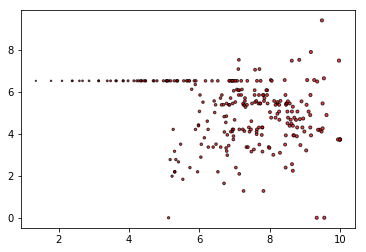

In [42]:
# make scatterplot of data using ? and ? 
plt.scatter(safety, economy, marker="o", facecolors="red", edgecolors="black",
            s=safety, alpha=0.75)

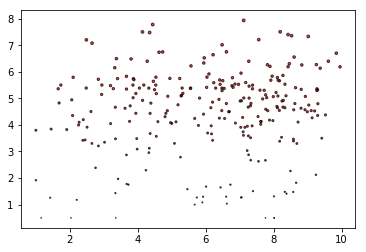

In [43]:
# make scatterplot of data using ? and ? 
plt.scatter(environmental_quality, outdoors, marker="o", facecolors="red", edgecolors="black",
            s=outdoors, alpha=0.75)